In [34]:
from tf_keras import Model
import tf_keras as keras
from tf_keras.layers import Dense, Flatten,Dropout
from tf_keras.optimizers import Adam
from datasets import load_dataset
import numpy as np
import tensorflow as tf

In [20]:
input_shape = (224, 224, 3)
img_height = img_width = 224
batch_size = 32

In [6]:
vgg16 = keras.applications.vgg16.VGG16(weights='imagenet', include_top=False, input_shape=input_shape)

In [7]:
for layer in vgg16.layers:
    layer.trainable = False

In [9]:
x = Flatten()(vgg16.output)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(1, activation='sigmoid')(x)

In [10]:
model_vgg = Model(inputs=vgg16.input, outputs=x)

In [13]:
model_vgg.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=1e-5), metrics=['accuracy'])

In [14]:
model_vgg.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [17]:
ds = load_dataset("Hemg/Deepfake-Audio-Dataset")

In [23]:
root = "../spectrograms"
test_ds = keras.utils.image_dataset_from_directory(str(root), 
                                               validation_split = 0.2,
                                               subset = 'validation',
                                               seed = 42,
                                               image_size = (img_height, img_width),
                                               batch_size = batch_size)

Found 100 files belonging to 2 classes.
Using 20 files for validation.


In [24]:
train_ds = keras.utils.image_dataset_from_directory(str(root), 
                                               validation_split = 0.2,
                                               subset = 'training',
                                               seed = 42,
                                               image_size = (img_height, img_width),
                                               batch_size = batch_size)

Found 100 files belonging to 2 classes.
Using 80 files for training.


In [25]:
history_vgg16 = model_vgg.fit(train_ds, epochs=7, 
                    validation_data=test_ds)

Epoch 1/7
3/3 [==============================] - 23s 7s/step - loss: 5.9162 - accuracy: 0.5875 - val_loss: 1.6917 - val_accuracy: 0.6500
Epoch 2/7
3/3 [==============================] - 20s 7s/step - loss: 3.2377 - accuracy: 0.6375 - val_loss: 0.5511 - val_accuracy: 0.8500
Epoch 3/7
3/3 [==============================] - 21s 7s/step - loss: 3.9909 - accuracy: 0.6250 - val_loss: 0.4197 - val_accuracy: 0.9000
Epoch 4/7
3/3 [==============================] - 27s 9s/step - loss: 2.7149 - accuracy: 0.7000 - val_loss: 0.3724 - val_accuracy: 0.9000
Epoch 5/7
3/3 [==============================] - 31s 10s/step - loss: 2.0241 - accuracy: 0.7750 - val_loss: 0.3538 - val_accuracy: 0.9000
Epoch 6/7
3/3 [==============================] - 23s 9s/step - loss: 0.8492 - accuracy: 0.8125 - val_loss: 0.3608 - val_accuracy: 0.9500
Epoch 7/7
3/3 [==============================] - 22s 8s/step - loss: 1.6616 - accuracy: 0.7750 - val_loss: 0.3982 - val_accuracy: 0.9500


In [26]:
loss, accuracy = model_vgg.evaluate(test_ds)
print('Validation accuracy:', accuracy)

1/1 [==============================] - 4s 4s/step - loss: 0.3982 - accuracy: 0.9500
Validation accuracy: 0.949999988079071


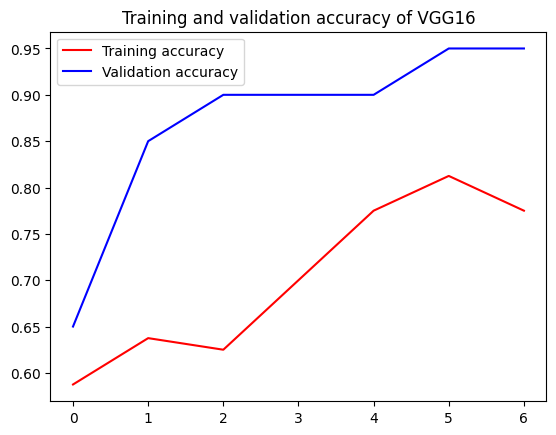

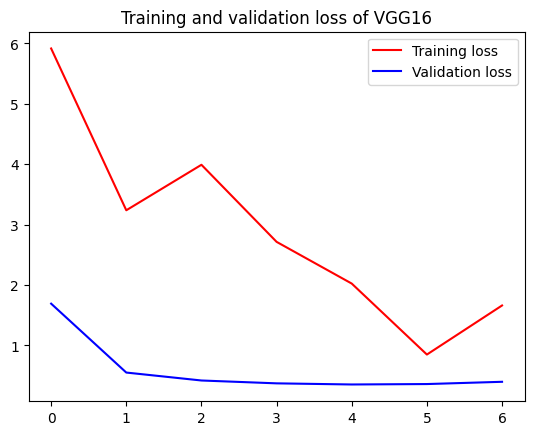

In [27]:
import matplotlib.pyplot as plt
acc = history_vgg16.history['accuracy']
val_acc = history_vgg16.history['val_accuracy']
loss = history_vgg16.history['loss']
val_loss = history_vgg16.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy of VGG16')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss of VGG16')
plt.legend()

plt.show()

In [31]:
for image_batch, label_batch in test_ds.take(1):
    break 

# Maintenant vous pouvez lancer la prédiction
predicted_batch = model_vgg.predict(image_batch)
class_names = np.array(test_ds.class_names)

1/1 [==============================] - 5s 5s/step


In [35]:
predicted_batch = model_vgg.predict(image_batch)
predicted_id = tf.math.argmax(predicted_batch, axis=-1)
predicted_label_batch = class_names[predicted_id]
print('VGG:',predicted_label_batch)

1/1 [==============================] - 5s 5s/step
VGG: ['FAKE' 'FAKE' 'FAKE' 'FAKE' 'FAKE' 'FAKE' 'FAKE' 'FAKE' 'FAKE' 'FAKE'
 'FAKE' 'FAKE' 'FAKE' 'FAKE' 'FAKE' 'FAKE' 'FAKE' 'FAKE' 'FAKE' 'FAKE']


In [ ]:
model_vgg.save('../models/my_vgg16.h5')

/Users/tiago/Documents/esilvA5/ecole/explain AI/Project/Xai-unified-interface/venv/lib/python3.10/site-packages/tf_keras/src/engine/training.py:3098: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native TF-Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
